#### 🧠 What is Feature Engineering?

**Feature engineering** is the process of:

* Selecting the most relevant variables (features)
* Creating new features from existing ones
* Transforming features to be more suitable for machine learning models

It’s the art of **making your data more understandable to the model**.

---

#### 📘 What You’ll Learn in This Course

#### 1. **Introduction to Feature Engineering**

* What is a **feature**?
* Why features matter more than the model in many cases.
* Introduction to techniques for:

  * Creating features
  * Transforming features
  * Selecting features

---

#### 2. **Baseline Model**

* Create a **baseline model** using raw features to compare improvements later.
* Example: Use a simple **Random Forest** without feature transformations.

```python
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
```

---

#### 3. **Better Features for Tree Models**

* Tree-based models (like Random Forests, XGBoost) don’t need feature scaling.
* You’ll learn:

  * How to handle **ordinal** vs **nominal** data
  * Creating **interaction features** (e.g. multiplying or combining two columns)

Example:

```python
data['price_per_sqft'] = data['price'] / data['square_feet']
```

---

#### 4. **Numeric Transformations**

* Transform numeric features to improve model performance:

  * **Log transforms** to reduce skew
  * **Scaling** (though less useful for trees)
  * Handling outliers
  * **Clipping** extreme values

```python
import numpy as np
data['log_income'] = np.log(data['income'] + 1)
```

---

#### 5. **Categorical Variables**

* Categorical variables can be tricky. You’ll explore:

  * One-hot encoding (works well with trees)
  * Label encoding
  * **Target encoding** (advanced; encode categories based on target value)
  * Cardinality issues (too many unique categories)

```python
# One-hot encoding
data = pd.get_dummies(data, columns=['neighborhood'])
```

---

#### 6. **Feature Generation**

* How to **create new features** from dates, text, and domain knowledge.
* Examples:

  * Extracting **day of week** from a date
  * Counting **number of words** in a text
  * Binning numeric variables into categories (e.g. age groups)

```python
data['year'] = data['date'].dt.year
data['name_length'] = data['name'].apply(len)
```

---

#### 7. **Feature Selection**

* Not all features help — some hurt.
* You’ll learn to:

  * Use **correlation** and **importance scores** to drop useless features
  * Use `Permutation Importance` to see how much each feature affects model performance

```python
from sklearn.inspection import permutation_importance
results = permutation_importance(model, X_val, y_val)
```

---

#### ✅ Skills You'll Gain

* Create new, meaningful features from raw data
* Transform features for better model learning
* Use feature importance to prune or prioritize features
* Improve model accuracy by using better input variables

#### Practice

In [3]:
import pandas as pd

df = pd.DataFrame({"Age": [18, 22, 25, 29, 35, 42, 50, 58]})
df["Age_q4"] = pd.qcut(df["Age"], 4, labels=False)
df

,Age,Age_q4
0,18,0
1,22,0
2,25,1
3,29,1
4,35,2
5,42,2
6,50,3
7,58,3


#### Positive Skew

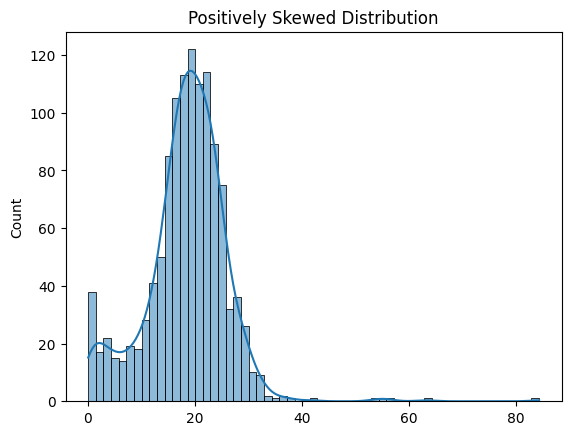

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.concatenate([np.random.normal(20, 5, 1000), np.random.exponential(10, 200)])

sns.histplot(data, kde=True)
plt.title("Positively Skewed Distribution")
plt.show()

In [15]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

# Select numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Identify skewed columns
skewed_cols = df[numeric_cols].apply(skew).abs()
skewed_cols = skewed_cols[skewed_cols > 0.5].index  # moderate skew

# Apply Yeo-Johnson only on skewed columns
pt = PowerTransformer(method="yeo-johnson")
if skewed_cols is not None and not skewed_cols.empty:
    df[skewed_cols] = pt.fit_transform(df[skewed_cols])
else:
    print("numeric_cols are symmetric...")

numeric_cols are symmetric...


In [8]:
!uv add sci-kit learn


Resolved 163 packages in 6.11s
   Building learn==1.0.0
      Built learn==1.0.0
Prepared 2 packages in 823ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 2 packages in 9ms
 + learn==1.0.0
 + sci-kit==0.1.0


In [9]:
!uv add scikit-learn


Resolved 167 packages in 692ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 4 packages in 2.72s
 + joblib==1.5.2
 + scikit-learn==1.7.2
 + scipy==1.16.2
 + threadpoolctl==3.6.0
